In [31]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.linear_model import Ridge

In [2]:
dataset = pd.read_csv('D:\projects\ML\Linear-Regression\data\energydata_complete.csv')

In [3]:
dataset.shape

(19735, 29)

In [4]:
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
X = dataset['T2']

In [6]:
Y = dataset['T6']

In [10]:
Y.isnull().any()

False

In [14]:
X

0        19.200000
1        19.200000
2        19.200000
3        19.200000
4        19.200000
           ...    
19730    25.890000
19731    25.754000
19732    25.628571
19733    25.414000
19734    25.264286
Name: T2, Length: 19735, dtype: float64

In [15]:
Y

0         7.026667
1         6.833333
2         6.560000
3         6.433333
4         6.366667
           ...    
19730    24.796667
19731    24.196667
19732    23.626667
19733    22.433333
19734    21.026667
Name: T6, Length: 19735, dtype: float64

<AxesSubplot:xlabel='T6'>

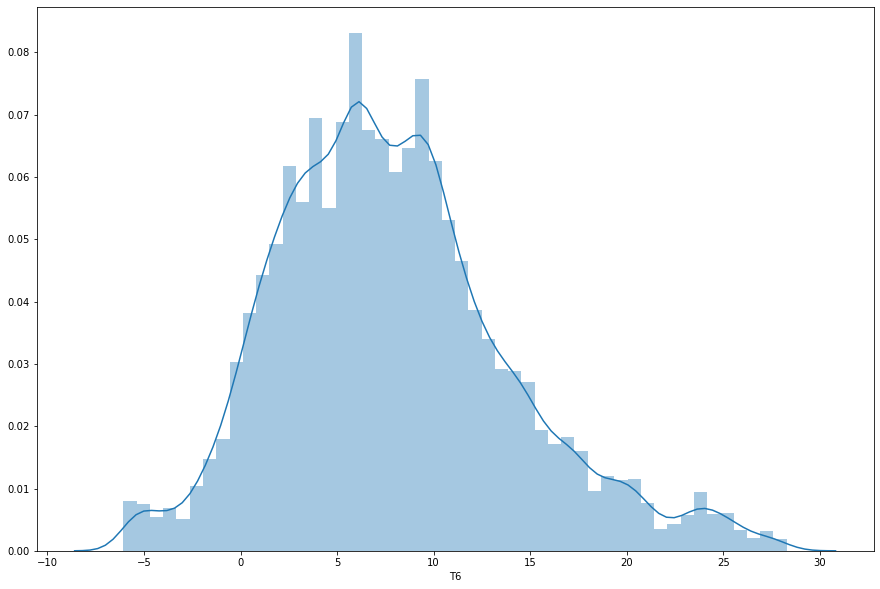

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(Y)

In [16]:
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [17]:
X

array([[19.2       ],
       [19.2       ],
       [19.2       ],
       ...,
       [25.62857143],
       [25.414     ],
       [25.26428571]])

In [18]:
Y

array([[ 7.02666667],
       [ 6.83333333],
       [ 6.56      ],
       ...,
       [23.62666667],
       [22.43333333],
       [21.02666667]])

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [22]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-37.36585299]
[[2.22531769]]


In [23]:
Y_pred = regressor.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df1= df.sample(35, random_state=7)
df1

,Actual,Predicted
1971,13.348571,12.481263
4355,10.860000,12.236478
2027,4.690000,10.315287
5651,3.982222,3.335207
2680,-1.530000,6.472905
1634,2.590000,4.025056
737,10.963333,6.673184
3690,9.263333,5.783057
5413,24.193333,21.738585
700,10.526667,9.439996


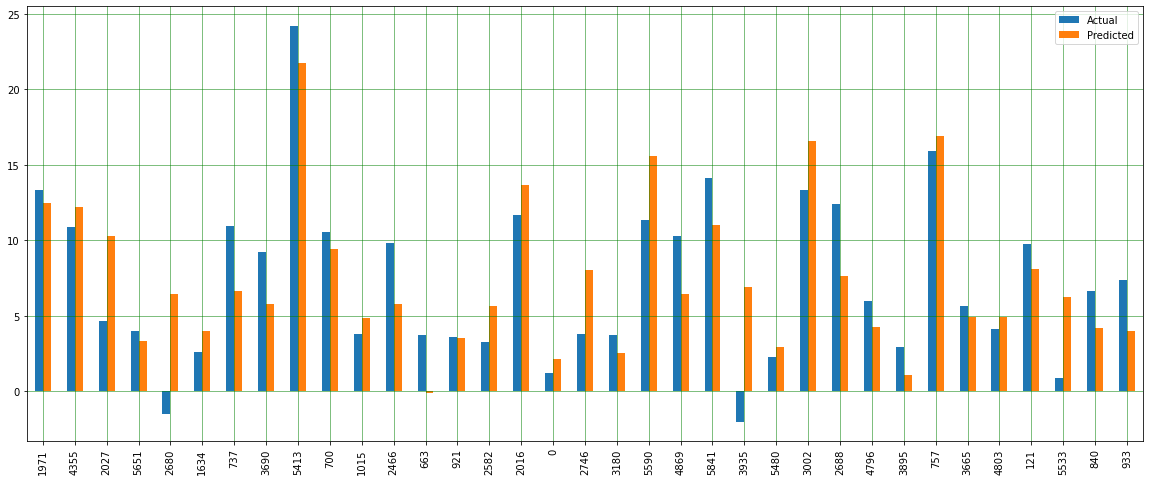

In [27]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
#Evaluate the performance of the algorithm
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, Y_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),2))
print('R-Squared:', round(metrics.r2_score(Y_test, Y_pred),2))
print('Residual Sum of Squares:', round(np.sum(np.square(Y_test - Y_pred)),2))

Mean Absolute Error: 2.82
Mean Squared Error: 13.18
Root Mean Squared Error: 3.63
R-Squared: 0.64
Residual Sum of Squares: 78033.97


In [33]:
rr = Ridge(alpha=0.4) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, Y_train)

Ridge(alpha=0.4)

In [34]:
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)

In [35]:
print("ridge regression train score low alpha:", Ridge_train_score) 
print("ridge regression test score low alpha:", Ridge_test_score) 

ridge regression train score low alpha: 0.6415148739577239
ridge regression test score low alpha: 0.6427789666574257


In [36]:
#To retrieve the intercept:
print(rr.intercept_)

#For retrieving the slope:
print(rr.coef_)

[-37.36558083]
[[2.22530431]]


In [37]:
Y_pred = rr.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df1= df.sample(35, random_state=7)
df1

,Actual,Predicted
1971,13.348571,12.481236
4355,10.860000,12.236452
2027,4.690000,10.315273
5651,3.982222,3.335235
2680,-1.530000,6.472914
1634,2.590000,4.025079
737,10.963333,6.673191
3690,9.263333,5.783070
5413,24.193333,21.738502
700,10.526667,9.439986


In [39]:
#Evaluate the performance of the algorithm
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, Y_pred),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_pred),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),2))
print('R-Squared:', round(metrics.r2_score(Y_test, Y_pred),2))
print('Residual Sum of Squares:', round(np.sum(np.square(Y_test - Y_pred)),2))

Mean Absolute Error: 2.82
Mean Squared Error: 13.18
Root Mean Squared Error: 3.63
R-Squared: 0.64
Residual Sum of Squares: 78033.97
